Note: you may need to restart the kernel to use updated packages.
Execution Time: 42.63 sec
Image saved as: ising_result_T2.3.png


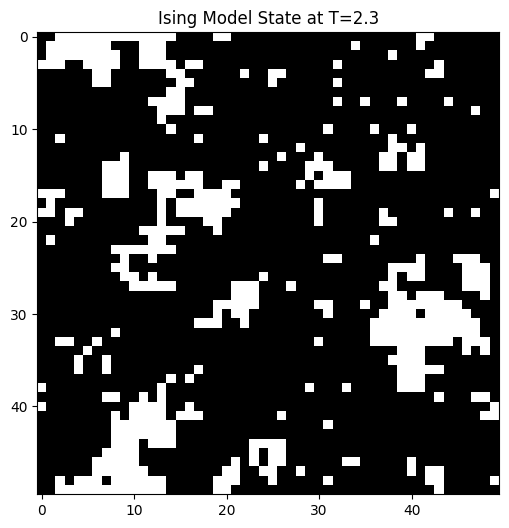

In [7]:
%pip install numba
import numpy as np
import matplotlib.pyplot as plt
from numba import jit  # <--- これを追加！
import time

# --- 設定 ---
N = 50
Temp = 2.3      # 臨界点付近を見る
Steps = 500000  # 高速化するので回数を5倍に増やしても一瞬で終わる

# --- 関数定義 ---

def initial_state(N):
    return 2 * np.random.randint(2, size=(N, N)) - 1

# @jit(nopython=True) をつけるだけで、この関数はC++並みに爆速になる
@jit(nopython=True)
def mcmc_move_fast(config, beta, N):
    for _ in range(N * N):
        a = np.random.randint(0, N)
        b = np.random.randint(0, N)
        s = config[a, b]
        
        # 周期的境界条件 (Periodic Boundary Condition)
        nb = config[(a+1)%N, b] + config[(a-1+N)%N, b] + \
             config[a, (b+1)%N] + config[a, (b-1+N)%N]
        
        cost = 2 * s * nb
        
        if cost < 0:
            s *= -1
        elif np.random.rand() < np.exp(-cost * beta):
            s *= -1
        config[a, b] = s
    return config

# --- メイン処理 ---

start_time = time.time()

# 初期化
config = initial_state(N)
beta = 1.0 / Temp

# シミュレーション実行
for i in range(Steps):
    mcmc_move_fast(config, beta, N)

end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} sec")

# --- 可視化と保存 ---
plt.figure(figsize=(6, 6))
plt.imshow(config, cmap='gray', interpolation='nearest')
plt.title(f'Ising Model State at T={Temp}')
# plt.show() の前にこれを書く
filename = f"ising_result_T{Temp}.png"
plt.savefig(filename)  # <--- これでカレントディレクトリに画像が保存される
print(f"Image saved as: {filename}")
plt.show()

Note: you may need to restart the kernel to use updated packages.
Execution Time: 35.81 sec
Image saved as: ising_result_T1.0.png


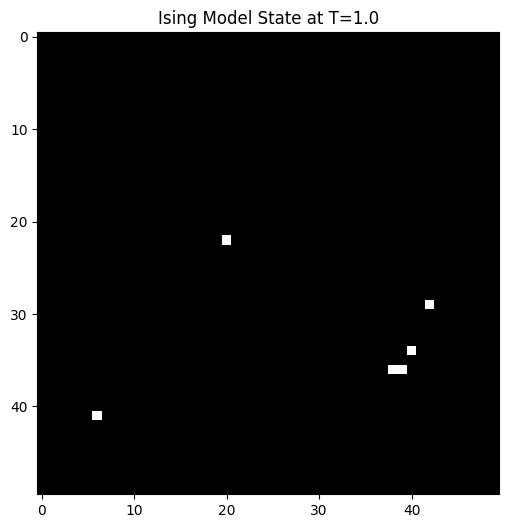

In [8]:
%pip install numba
import numpy as np
import matplotlib.pyplot as plt
from numba import jit 
import time


N = 50
Temp = 1.0     
Steps = 500000  

# --- 関数定義 ---

def initial_state(N):
    return 2 * np.random.randint(2, size=(N, N)) - 1

@jit(nopython=True)
def mcmc_move_fast(config, beta, N):
    for _ in range(N * N):
        a = np.random.randint(0, N)
        b = np.random.randint(0, N)
        s = config[a, b]
        
        nb = config[(a+1)%N, b] + config[(a-1+N)%N, b] + \
             config[a, (b+1)%N] + config[a, (b-1+N)%N]
        
        cost = 2 * s * nb
        
        if cost < 0:
            s *= -1
        elif np.random.rand() < np.exp(-cost * beta):
            s *= -1
        config[a, b] = s
    return config

# --- メイン処理 ---

start_time = time.time()

# 初期化
config = initial_state(N)
beta = 1.0 / Temp

# シミュレーション実行
for i in range(Steps):
    mcmc_move_fast(config, beta, N)

end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} sec")

# --- 可視化と保存 ---
plt.figure(figsize=(6, 6))
plt.imshow(config, cmap='gray', interpolation='nearest')
plt.title(f'Ising Model State at T={Temp}')
# plt.show() の前にこれを書く
filename = f"ising_result_T{Temp}.png"
plt.savefig(filename)  # <--- これでカレントディレクトリに画像が保存される
print(f"Image saved as: {filename}")
plt.show()